# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
!pwd

/c/Users/Joe Coffaro/Desktop/NU-VIRT-DATA-PT-04-2024-U-LOLC


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(study_results, mouse_metadata, how="inner", on="Mouse ID")

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_data_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_data_df[mouse_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicate_id = duplicate_id["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_df.loc[mouse_data_df['Mouse ID'].isin(duplicate_id)]
mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df2 = mouse_data_df.drop(mouse_data_df[mouse_data_df["Mouse ID"].isin(duplicate_id)].index)
mouse_data_df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_df2["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = mouse_data_df2['Tumor Volume (mm3)'].groupby(mouse_data_df2['Drug Regimen']).mean()
median = mouse_data_df2['Tumor Volume (mm3)'].groupby(mouse_data_df2['Drug Regimen']).median()
std = mouse_data_df2['Tumor Volume (mm3)'].groupby(mouse_data_df2['Drug Regimen']).std()
sem = mouse_data_df2['Tumor Volume (mm3)'].groupby(mouse_data_df2['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
stats_summary_df=pd.DataFrame({'Mean Tumor Volume':mean,
                               'Median Tumor Volume':median,
                               'St.Dev of Tumor Volume':std,
                               'SEM of Tumor Volume':sem,
                               })
stats_summary_df

,Mean Tumor Volume,Median Tumor Volume,St.Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = mouse_data_df2.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df.map('{:,.3f}'.format)

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

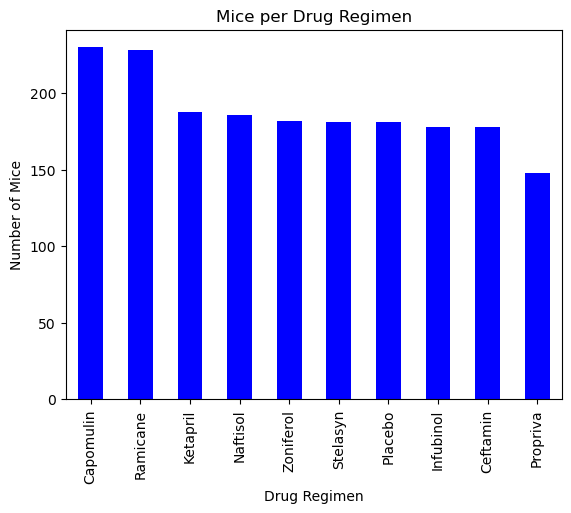

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count=mouse_data_df2['Drug Regimen'].value_counts()
mouse_count.plot(kind='bar', color='blue', title='Mice per Drug Regimen', ylabel='Number of Mice')
plt.show()

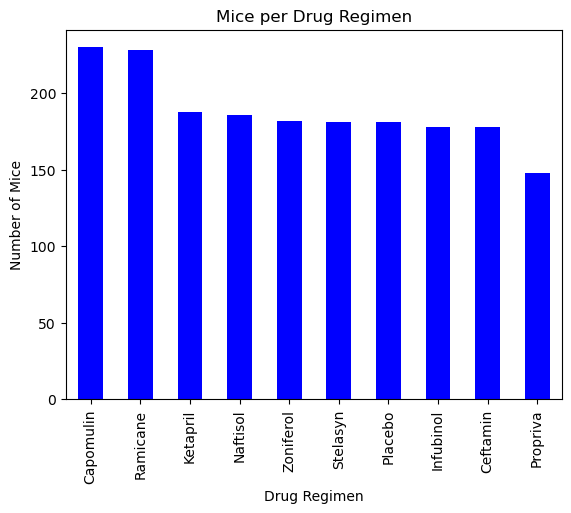

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count.plot(kind='bar', color='blue', title='Mice per Drug Regimen', ylabel='Number of Mice')
plt.show()

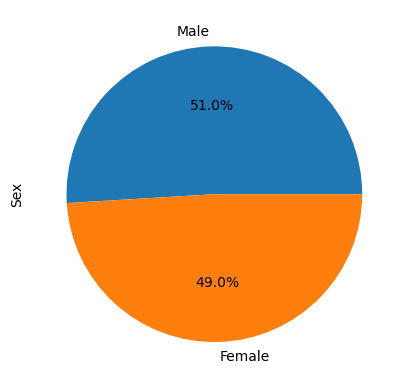

In [11]:
pie_count = mouse_data_df2.groupby("Sex").size()

pie_count = pie_count.sort_values(ascending=False)

pie_count.plot.pie(ylabel="Sex", autopct="%1.1f%%");

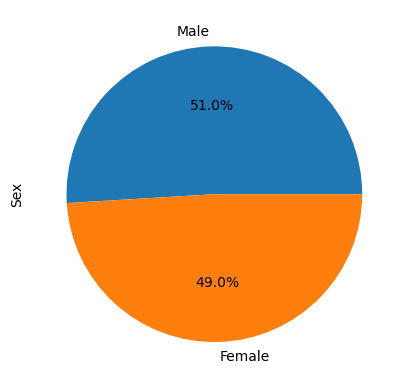

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    pie_count,
    labels=pie_count.index,
    autopct="%1.1f%%",
    shadow=False,
    startangle=0
)
plt.ylabel("Sex")
plt.show();

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# treatment_regimens = ["Capomulin", 
#                 "Ramicane",
#                 "Infubinol",
#                 "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
# selected_treatment = mouse_data_df2[mouse_data_df2["Drug Regimen"].isin(treatment_regimens)]
# selected_treatment = selected_treatment.sort_values(["Mouse ID","Timepoint"])
# selected_treatment = selected_treatment.reset_index()
# max_timepoint = selected_treatment.groupby(["Mouse ID")["Timepoint"].max()
max_timepoint = mouse_data_df2.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
selected_treatment_max = max_timepoint.merge(mouse_data_df2, how="left", on=["Mouse ID", "Timepoint"])
# selected_treatment_max = selected_treatment_max.rename(columns = {"Timepoint_y":"Max Timepoint",
                                                      # "Timepoint_x":"Timepoint"})

In [20]:
selected_treatment_max.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", 
                "Ramicane",
                "Infubinol",
                "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = selected_treatment_max.loc[selected_treatment_max["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    upper_bound = upper_q + (1.5 * iqr)
    lower_bound = lower_q - (1.5 * iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


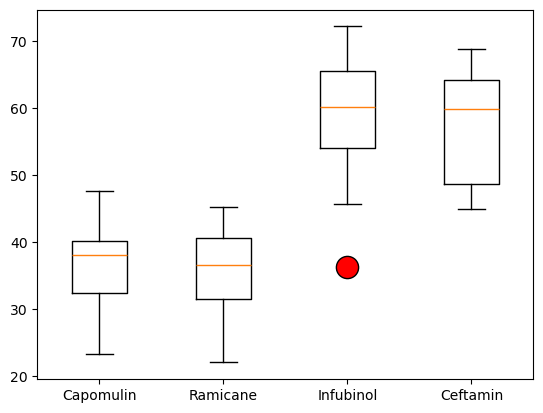

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier = {"markerfacecolor" : "red","markersize": 16}
plt.boxplot(tumor_vol_list, labels=treatment_regimens, flierprops=outlier)
plt.show();

## Line and Scatter Plots

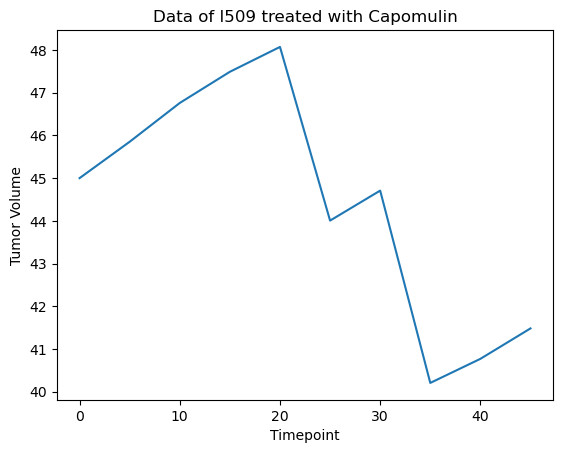

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
capomulin_data = mouse_data_df2.loc[mouse_data_df2["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == mouse_id]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title(f"Data of {mouse_id} treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show();

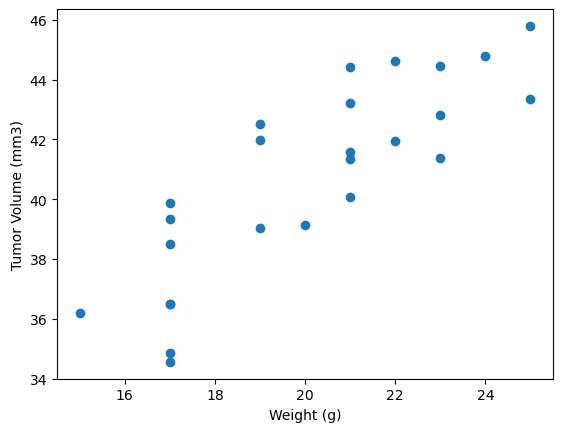

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = capomulin_data.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show();

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])[0],2)
corr

0.84

In [38]:
model = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

In [39]:
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

$$ y_{hat} = slope * x + intercept $$

In [41]:
y_values = capomulin_avg["Weight (g)"] * model[0] + model[1]

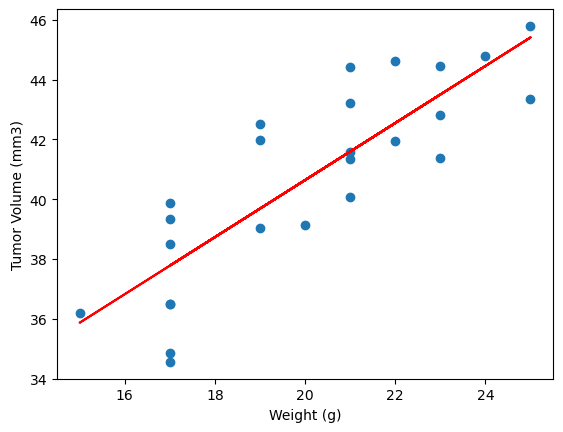

In [45]:
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], y_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show();